# ATLAS Competition

### Łukasz Schab

### W tym dokumencie dokumencie dokonam analizy danych data_atlas.csv, a następnię zbuduję modele predykcyjne w celu przewidzenia zmiennej credit_risk

#### Importuję potrzebne biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#### Wczytuję dane

In [2]:
data = pd.read_csv("data_atlas.csv")

#### Wyświetlam losową próbkę danych

In [3]:
data.sample(5)

,Unnamed: 0,age,income,children,credit_history,overdue_payments,active_loans,years_in_job,employment_type,owns_property,assets_value,other_loans,education,city,marital_status,support_indicator,credit_risk
1766,1766,61,20053 złoty,1 dzieci,dobra historia,brak opóźnień,1,8,samozatrudnienie,nie,48882 złoty,1,średnie,duże,żonaty/zamężna,0.815219,0
3239,3239,49,NaN,3 dzieci,dobra historia,NaN,1,14,samozatrudnienie,nie,84919 złoty,1,wyższe,średnie,kawaler/panna,0.878825,0
455,455,32,NaN,brak,dobra historia,opóźnienia,3,3,stała,tak,NaN,1,wyższe,małe,żonaty/zamężna,0.748274,0
7034,7034,56,22374 złoty,1 dzieci,dobra historia,brak opóźnień,2,12,stała,tak,57322 złoty,1,średnie,małe,kawaler/panna,0.875753,0
737,737,49,NaN,3 dzieci,brak historii,opóźnienia,2,6,stała,nie,165585 złoty,0,średnie,średnie,rozwiedziony/rozwiedziona,0.931317,0


#### Sprawdzam typy danych

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   age                 10000 non-null  int64  
 2   income              8000 non-null   object 
 3   children            10000 non-null  object 
 4   credit_history      8000 non-null   object 
 5   overdue_payments    8000 non-null   object 
 6   active_loans        10000 non-null  int64  
 7   years_in_job        10000 non-null  int64  
 8   employment_type     10000 non-null  object 
 9   owns_property       8000 non-null   object 
 10  assets_value        8000 non-null   object 
 11  other_loans         10000 non-null  int64  
 12  education           10000 non-null  object 
 13  city                10000 non-null  object 
 14  marital_status      10000 non-null  object 
 15  support_indicator   10000 non-null  float64
 16  credi

#### Usuwam braki danych

In [5]:
data = data.dropna()

#### Konwertuję kolumnę income oraz assets_value na typ int, oraz usuwam kolumnę "Unnamed:0"

In [6]:
data["income"] = data["income"].str.replace(" złoty","").astype(int)
data["assets_value"] = data["assets_value"].str.replace(" złoty","").astype(int)
data = data.drop("Unnamed: 0",axis=1)

In [7]:
#Sprawdzamy standardowe parametry statystyczne danych
data.describe()

,age,income,active_loans,years_in_job,assets_value,other_loans,support_indicator,credit_risk
count,3284.000000,3284.000000,3284.000000,3284.00000,3284.000000,3284.000000,3284.000000,3284.000000
mean,39.628197,23561.209196,1.479903,9.50335,79575.790195,0.409866,0.502103,0.028928
std,9.892308,9788.237301,1.228367,4.87145,69505.029222,0.491884,0.285643,0.167630
min,18.000000,4154.000000,0.000000,0.00000,10000.000000,0.000000,0.000117,0.000000
25%,33.000000,15781.000000,1.000000,6.00000,34018.250000,0.000000,0.267069,0.000000
50%,40.000000,21845.000000,1.000000,9.00000,58740.000000,0.000000,0.504335,0.000000
75%,46.000000,31066.500000,2.000000,13.00000,102045.750000,1.000000,0.734961,0.000000
max,70.000000,40000.000000,8.000000,29.00000,500000.000000,1.000000,0.999983,1.000000


#### Dokonuję one-hot-encodingu na wartościach typu object

In [8]:
one_hot_data = pd.get_dummies(data,columns=["children","credit_history","overdue_payments","employment_type","owns_property","education","city","marital_status"]);

#### Dzielę dane na zmienne niezależne i zmienną zależną

In [9]:
X = one_hot_data.drop("credit_risk",axis=1)
y = one_hot_data["credit_risk"]

#### Dzielę dane na zbiór treningowy oraz zbiór testowy

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X , y,test_size = 0.2, random_state=42)

#### Tworzę model drzewa decyzyjnego

In [11]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)

#### Tworzę model lasu losowego

In [12]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred_forest = forest.predict(X_test)

#### Tworzę model maszyny wektorów nośnych

In [13]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)

#### Tworzę model XGBOOST

In [14]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

#### Tworzę model naiwnego klasyfikatora Bayesa

In [15]:
bayes = GaussianNB()
bayes.fit(X_train,y_train)
y_pred_bayes = bayes.predict(X_test)

#### Sprawdzam metryki stworzonych modeli

In [16]:
models = { "Decision Tree" : y_pred_tree,
           "Random Forest" : y_pred_forest,
           "SVM" : y_pred_svm,
           "XGB" : y_pred_xgb,
           "Bayes":y_pred_bayes,
         }

summary = {"Model":[],"Accuracy":[],"Recall":[],"Specificity":[]}
for model in models:
    summary["Model"].append(model)
    summary["Accuracy"].append(round(accuracy_score(y_test,models[model]),3))
    summary["Recall"].append(round(recall_score(y_test,models[model]),3))
    summary["Specificity"].append(round(specificity_score(y_test,models[model]),3))
results = pd.DataFrame(summary)
results

,Model,Accuracy,Recall,Specificity
0,Decision Tree,1.000,1.000,1.0
1,Random Forest,0.998,0.938,1.0
2,SVM,0.976,0.000,1.0
3,XGB,0.998,0.938,1.0
4,Bayes,0.976,0.000,1.0


#### Tworzę macierze konfuzji dla każdego z modeli

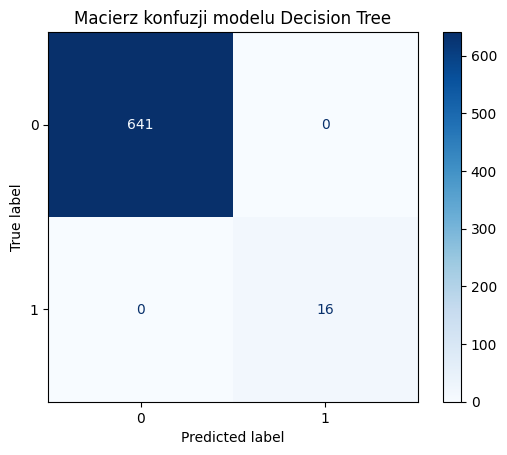

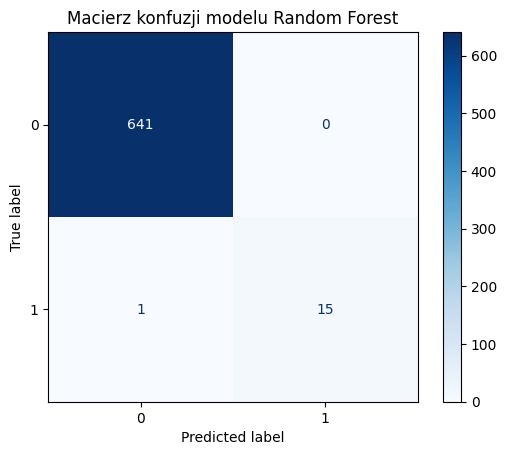

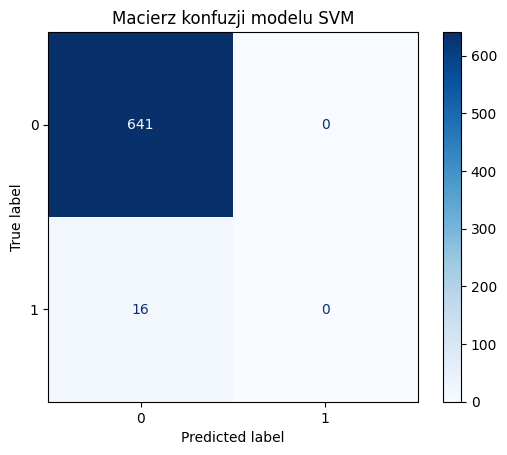

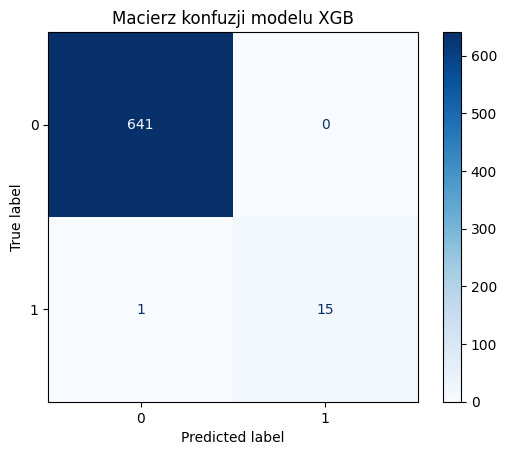

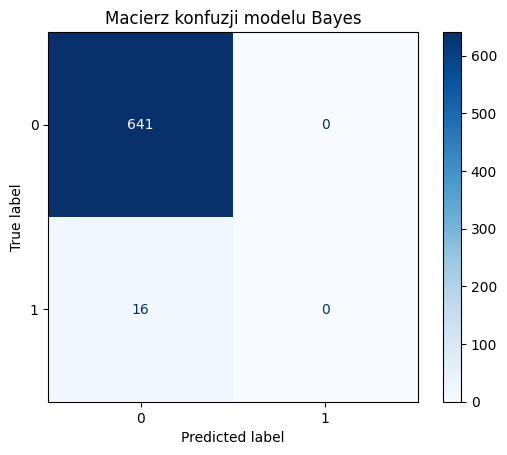

In [17]:
for model in models:
    cmatrix_display = ConfusionMatrixDisplay(confusion_matrix(y_test, models[model]))
    cmatrix_display.plot(cmap = plt.cm.Blues)
    plt.title(f"Macierz konfuzji modelu {model}")

#### Jak więc widać model który sprawdził się najlepiej, a nawet perfekcyjnie to model drzewa decyzyjnego

#### Najgorzej spisały się zaś model maszyny wektorów nośnych oraz model naiwnego klasyfikatora Bayesa